# Business Understanding

The purpose of this analysis and modeling is to gain understanding of salaries in the tech industry and what factors affect it.  It was requested to look into three questions of interest; I've outlined 4 below.

1) What does the base salary and total annual compensation distribtion look like for various tech jobs?

2) What is the average number of years people stay at a company?

3) Is there any gender bias for the total annual compensation in the tech industry?

4) What are the biggest contributors to the total annual compensation in the tech industry?

# Data Understanding, Data Preparation and Evaluation

In this section I will explore the data to answer most of the questions posed.  Each subheading will pertain to one of the questions stated above (along with some subsections where I wanted to explore more questions).  After this section I will move on to the modeling and evaluation of that part separately

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Read in the data
Data was obtained from Kaggle "Data Science and STEM Salaries" 
(https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries/versions/1?resource=download)


In [54]:
df = pd.read_csv('./Levels_Fyi_Salary_Data.csv')
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
6,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,NaN,180000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
7,6/22/2017 13:55:26,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,NaN,135000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
8,6/22/2017 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
9,6/26/2017 21:25:45,Microsoft,63,Software Engineer,201000,"Seattle, WA",12.0,6.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [55]:
df.shape

(62642, 29)

In [56]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [57]:
df.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

In [58]:
df['company'].value_counts()

Amazon                       8126
Microsoft                    5216
Google                       4330
Facebook                     2990
Apple                        2028
Oracle                       1128
Salesforce                   1056
Intel                         949
Cisco                         907
IBM                           907
Uber                          880
Capital One                   778
LinkedIn                      701
VMware                        657
Qualcomm                      565
JPMorgan Chase                541
Bloomberg                     537
Goldman Sachs                 469
Intuit                        449
PayPal                        426
Deloitte                      401
Twitter                       395
Adobe                         383
Walmart Labs                  381
Nvidia                        357
Accenture                     355
Expedia                       352
eBay                          338
Wayfair                       338
SAP           

Looks like it may be already one-hot encoded for race

In [59]:
racedf = df[['Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race']]
racedf.head()

,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race
0,0,0,0,0,0,NaN
1,0,0,0,0,0,NaN
2,0,0,0,0,0,NaN
3,0,0,0,0,0,NaN
4,0,0,0,0,0,NaN


In [60]:
racedf[racedf['Race'].notnull()].head()

,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race
6921,0,1,0,0,0,White
8366,1,0,0,0,0,Asian
10937,0,0,0,1,0,Black
11997,1,0,0,0,0,Asian
14429,1,0,0,0,0,Asian


Looks like it may be already one-hot encoded for education

In [61]:
educationdf = df[['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Education']]
educationdf.head()

,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Education
0,0,0,0,0,0,NaN
1,0,0,0,0,0,NaN
2,0,0,0,0,0,NaN
3,0,0,0,0,0,NaN
4,0,0,0,0,0,NaN


In [62]:
educationdf[educationdf['Education'].notnull()].head()

,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Education
46,0,0,1,0,0,PhD
717,0,0,1,0,0,PhD
3427,0,0,1,0,0,PhD
5037,1,0,0,0,0,Master's Degree
5392,0,0,1,0,0,PhD


In [63]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


NOTE:

- Race and Education are both one-hot encoded already so can drop those columns and only use the one-hot encoding when predicting

## What is the company and title distributions of the respondents?

In [64]:
# The distribution of companies for respondents
valueCounts = df['company'].value_counts()
valueCounts

Amazon                       8126
Microsoft                    5216
Google                       4330
Facebook                     2990
Apple                        2028
Oracle                       1128
Salesforce                   1056
Intel                         949
Cisco                         907
IBM                           907
Uber                          880
Capital One                   778
LinkedIn                      701
VMware                        657
Qualcomm                      565
JPMorgan Chase                541
Bloomberg                     537
Goldman Sachs                 469
Intuit                        449
PayPal                        426
Deloitte                      401
Twitter                       395
Adobe                         383
Walmart Labs                  381
Nvidia                        357
Accenture                     355
Expedia                       352
eBay                          338
Wayfair                       338
SAP           

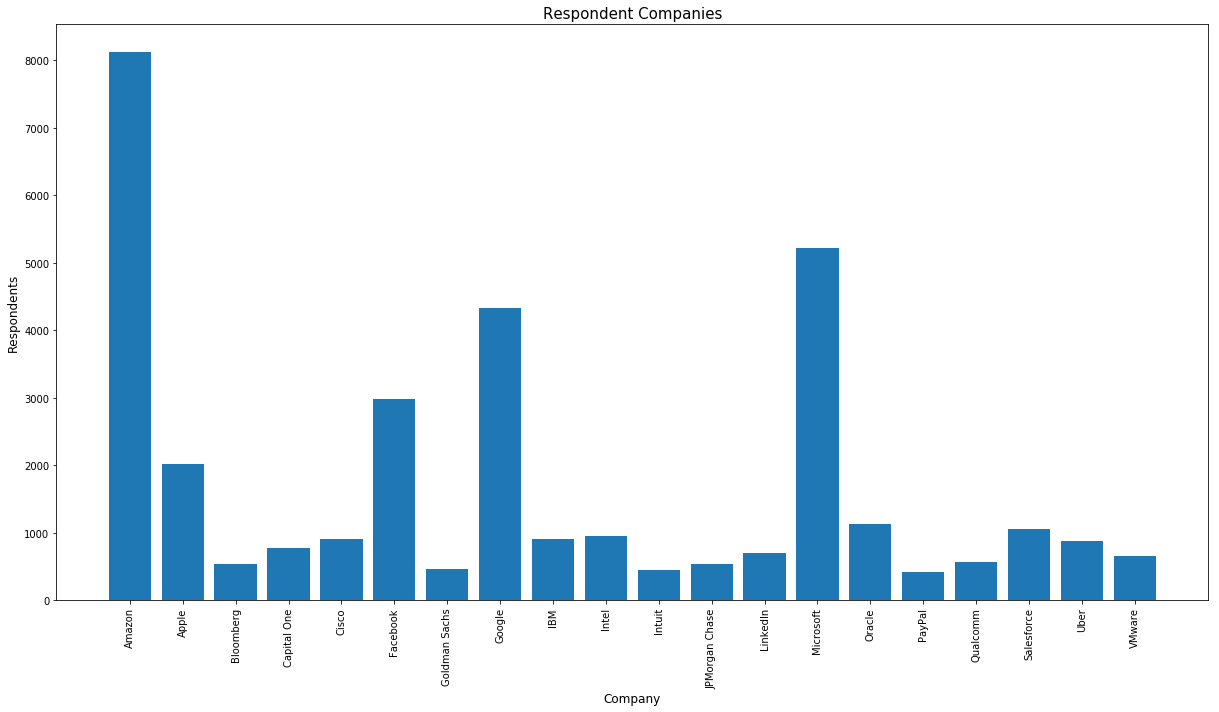

In [65]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0,0,1,1])
companies = list(valueCounts.index)[:20]
respondents = list(valueCounts.values)[:20]
ax.bar(companies,respondents)
plt.xticks(rotation=90)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Respondents', fontsize=12)
plt.title('Respondent Companies', fontsize=15)
plt.show()

In [66]:
# The distribution of job titles for respondents
df['title'].value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

Conclusions:

- Top 10 companies respondents belong to are: Amazon, Microsoft, Google, Facebook, Apple, Oracle, Salesforce, Intel, Cisco, IBM

- Overwhelming number of respondents are Software Engineering.  Would be good to downsample for predictions if had more time

## What does the base salary distribution look like for various tech jobs?

In [67]:
# Look at the mean base salary for each of the job titles
meanBaseSalaries = df[['title', 'basesalary']].groupby(['title']).mean().rename(columns={"basesalary": "meanBaseSalary"})
meanBaseSalaries


,meanBaseSalary
title,
Business Analyst,103505.084746
Data Scientist,138054.693561
Hardware Engineer,139628.181818
Human Resources,128590.659341
Management Consultant,136195.696721
Marketing,140957.746479
Mechanical Engineer,118455.102041
Product Designer,137163.588391
Product Manager,148663.562166


In [68]:
# Look at the max base salary for each of the job titles
maxBaseSalaries = df[['title', 'basesalary']].groupby(['title']).max().rename(columns={"basesalary": "maxBaseSalary"})
maxBaseSalaries

,maxBaseSalary
title,
Business Analyst,275000.0
Data Scientist,700000.0
Hardware Engineer,341000.0
Human Resources,350000.0
Management Consultant,900000.0
Marketing,750000.0
Mechanical Engineer,260000.0
Product Designer,340000.0
Product Manager,1659870.0


In [69]:
salarydf = meanBaseSalaries.join(maxBaseSalaries, on=['title']).sort_values(by=['meanBaseSalary'], ascending=False)
salarydf

,meanBaseSalary,maxBaseSalary
title,,
Software Engineering Manager,174204.469039,850000.0
Technical Program Manager,156454.742940,430000.0
Product Manager,148663.562166,1659870.0
Marketing,140957.746479,750000.0
Solution Architect,140173.509075,400000.0
Hardware Engineer,139628.181818,341000.0
Data Scientist,138054.693561,700000.0
Product Designer,137163.588391,340000.0
Management Consultant,136195.696721,900000.0


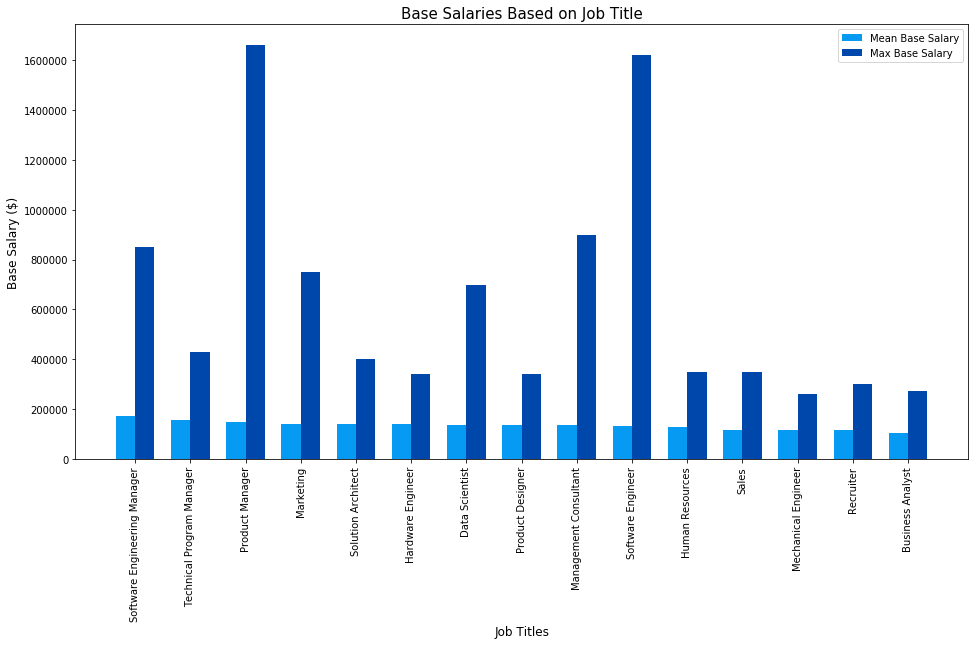

In [70]:
N = salarydf.shape[0]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, list(salarydf['meanBaseSalary']), width, color='#069AF3')
rects2 = ax.bar(ind+width, list(salarydf['maxBaseSalary']), width, color='#0047AB')

# add some
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( list(salarydf.index) )

ax.legend( (rects1[0], rects2[0]), ('Mean Base Salary', 'Max Base Salary') )
plt.xticks(rotation=90)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Base Salary ($)', fontsize=12)
plt.title('Base Salaries Based on Job Title', fontsize=15)


plt.show()

- Look at mean/max base salary based on company instead of job title

- Look at only top 20 companies for mean base salary since there are so many

In [71]:
meanBaseSalaries_company = df[['company', 'basesalary']].groupby(['company']).mean().rename(columns={"basesalary": "meanBaseSalary"})
maxBaseSalaries_company = df[['company', 'basesalary']].groupby(['company']).max().rename(columns={"basesalary": "maxBaseSalary"})
salarydf_company = meanBaseSalaries_company.join(maxBaseSalaries_company, on=['company']).sort_values(by=['meanBaseSalary'], ascending=False).head(20)



In [72]:
testdf = meanBaseSalaries_company.join(maxBaseSalaries_company, on=['company']).sort_values(by=['meanBaseSalary'], ascending=False).reset_index()
testdf[(testdf['company'] == 'google') | (testdf['company'] == 'facebook') | (testdf['company'] == 'amazon') | (testdf['company'] == 'Squarespace')]


,company,meanBaseSalary,maxBaseSalary
1,Squarespace,292545.454545,1620000.0
360,facebook,150571.428571,230000.0
690,google,131193.548387,250000.0
875,amazon,120136.363636,180000.0


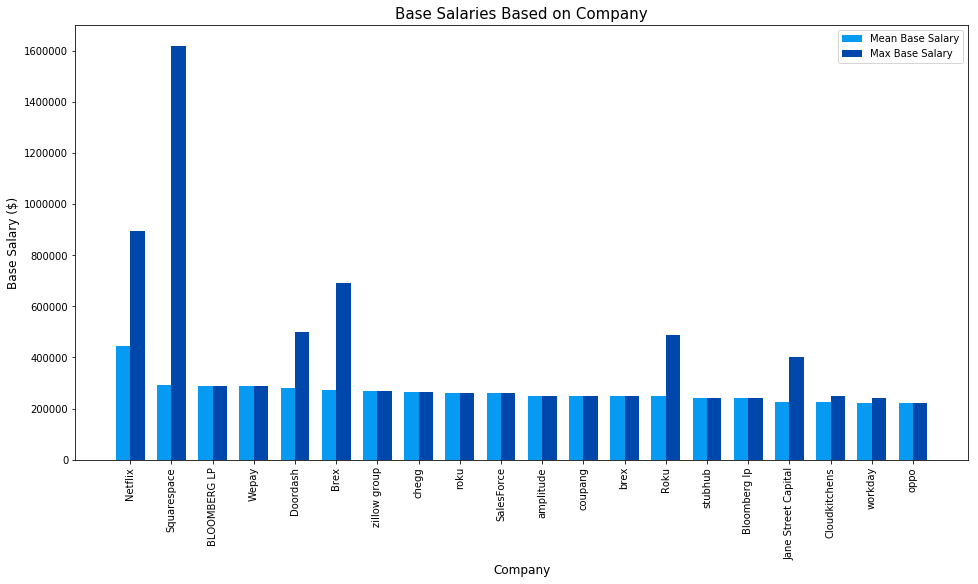

In [73]:
N = salarydf_company.shape[0]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, list(salarydf_company['meanBaseSalary']), width, color='#069AF3')
rects2 = ax.bar(ind+width, list(salarydf_company['maxBaseSalary']), width, color='#0047AB')

# add some
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( list(salarydf_company.index) )

ax.legend( (rects1[0], rects2[0]), ('Mean Base Salary', 'Max Base Salary') )
plt.xticks(rotation=90)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Base Salary ($)', fontsize=12)
plt.title('Base Salaries Based on Company', fontsize=15)


plt.show()

Do the same analyis as above but for location instead of title/company

In [74]:
meanBaseSalaries_location = df[['location', 'basesalary']].groupby(['location']).mean().rename(columns={"basesalary": "meanBaseSalary"})
maxBaseSalaries_location = df[['location', 'basesalary']].groupby(['location']).max().rename(columns={"basesalary": "maxBaseSalary"})
salarydf_location = meanBaseSalaries_location.join(maxBaseSalaries_location, on=['location']).sort_values(by=['meanBaseSalary'], ascending=False).head(20)



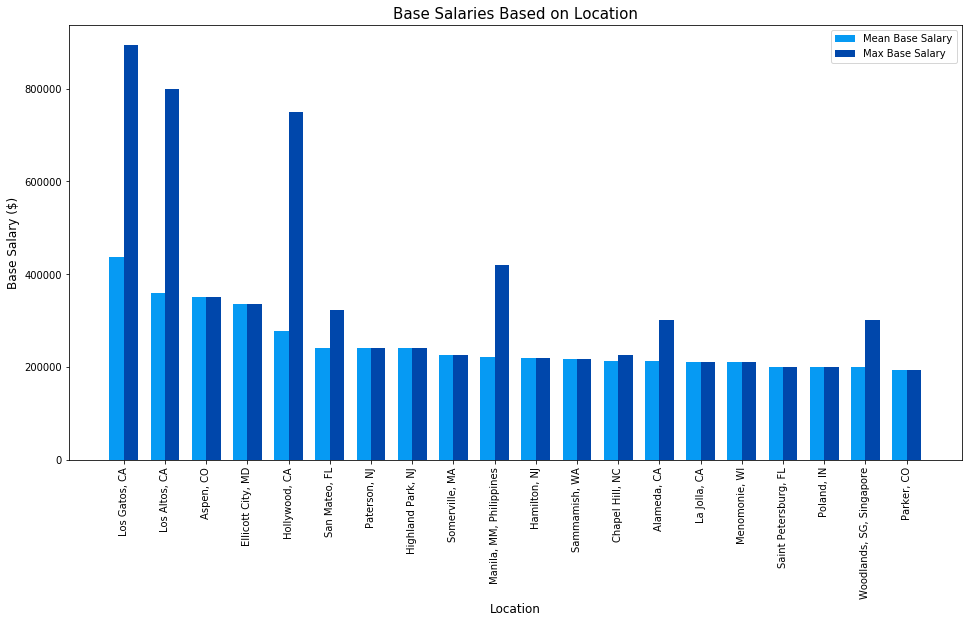

In [75]:
N = salarydf_location.shape[0]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, list(salarydf_location['meanBaseSalary']), width, color='#069AF3')
rects2 = ax.bar(ind+width, list(salarydf_location['maxBaseSalary']), width, color='#0047AB')

# add some
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( list(salarydf_location.index) )

ax.legend( (rects1[0], rects2[0]), ('Mean Base Salary', 'Max Base Salary') )
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Base Salary ($)', fontsize=12)
plt.title('Base Salaries Based on Location', fontsize=15)


plt.show()

Conclusions:

- The upper-bound for max base salary is very high compared to the mean base salary.

- Mean and max base salary stay pretty consistent for most companies except for a few like Netflix, Roku, Doordash, Brex.  Note that Netflix and Squarespace have the largest max base salary available which is where the high Product Management and Software Engineer jobs are

- Base salaries seem higher in CA and NJ

## What does the total annual compensation distribution look like for various tech jobs?

In [76]:
# Look at the mean annual compensation for each of the job titles
meanAnnualComp = df[['title', 'totalyearlycompensation']].groupby(['title']).mean().rename(columns={"totalyearlycompensation": "meanAnnualComp"})
meanAnnualComp

,meanAnnualComp
title,
Business Analyst,129727.683616
Data Scientist,203656.710628
Hardware Engineer,213655.000000
Human Resources,178711.538462
Management Consultant,162795.081967
Marketing,198971.830986
Mechanical Engineer,158442.857143
Product Designer,207637.203166
Product Manager,257813.396105


In [77]:
# Look at the max annual compensation for each of the job titles
maxAnnualComp = df[['title', 'totalyearlycompensation']].groupby(['title']).max().rename(columns={"totalyearlycompensation": "maxAnnualComp"})
maxAnnualComp


,maxAnnualComp
title,
Business Analyst,650000
Data Scientist,1000000
Hardware Engineer,1150000
Human Resources,525000
Management Consultant,1600000
Marketing,1470000
Mechanical Engineer,615000
Product Designer,950000
Product Manager,4980000


In [78]:
annualCompdf = meanAnnualComp.join(maxAnnualComp, on=['title']).sort_values(by=['meanAnnualComp'], ascending=False)
annualCompdf

,meanAnnualComp,maxAnnualComp
title,,
Software Engineering Manager,354635.752312,4950000
Product Manager,257813.396105,4980000
Technical Program Manager,237099.927589,1500000
Sales,214273.318872,1037000
Hardware Engineer,213655.000000,1150000
Solution Architect,212736.387208,990000
Product Designer,207637.203166,950000
Software Engineer,205403.992287,4490000
Data Scientist,203656.710628,1000000


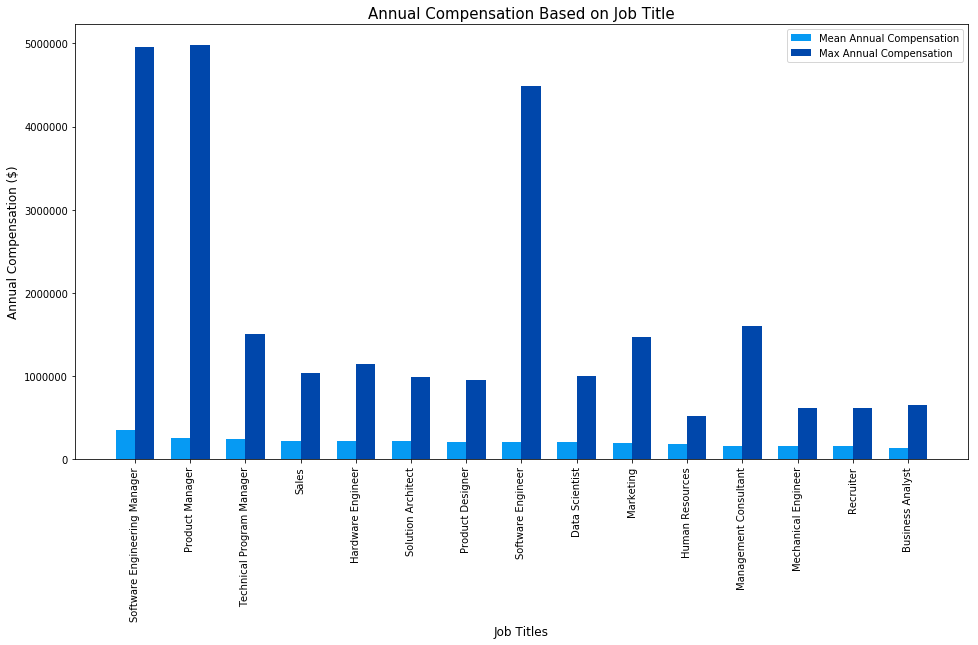

In [79]:
N = annualCompdf.shape[0]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, list(annualCompdf['meanAnnualComp']), width, color='#069AF3')
rects2 = ax.bar(ind+width, list(annualCompdf['maxAnnualComp']), width, color='#0047AB')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( list(annualCompdf.index) )

ax.legend( (rects1[0], rects2[0]), ('Mean Annual Compensation', 'Max Annual Compensation') )
plt.xticks(rotation=90)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Annual Compensation ($)', fontsize=12)
plt.title('Annual Compensation Based on Job Title', fontsize=15)


plt.show()

- Look at mean/max annual compensation based on company instead of job title

- Look at only top 20 company mean annual compensation since there are so many companies

In [80]:
meanAnnualComp_company = df[['company', 'totalyearlycompensation']].groupby(['company']).mean().rename(columns={"totalyearlycompensation": "meanAnnualComp"})
maxAnnualComp_company = df[['company', 'totalyearlycompensation']].groupby(['company']).max().rename(columns={"totalyearlycompensation": "maxAnnualComp"})
annualCompdf_company = meanAnnualComp_company.join(maxAnnualComp_company, on=['company']).sort_values(by=['meanAnnualComp'], ascending=False).head(20)


In [81]:
testdf = meanAnnualComp_company.join(maxAnnualComp_company, on=['company']).sort_values(by=['meanAnnualComp'], ascending=False).reset_index()
testdf[(testdf['company'] == 'google') | (testdf['company'] == 'facebook') | (testdf['company'] == 'amazon') | (testdf['company'] == 'Snap')]


,company,meanAnnualComp,maxAnnualComp
17,Snap,411166.666667,2500000
91,facebook,294928.571429,450000
212,google,236870.967742,500000
217,amazon,234803.030303,780000


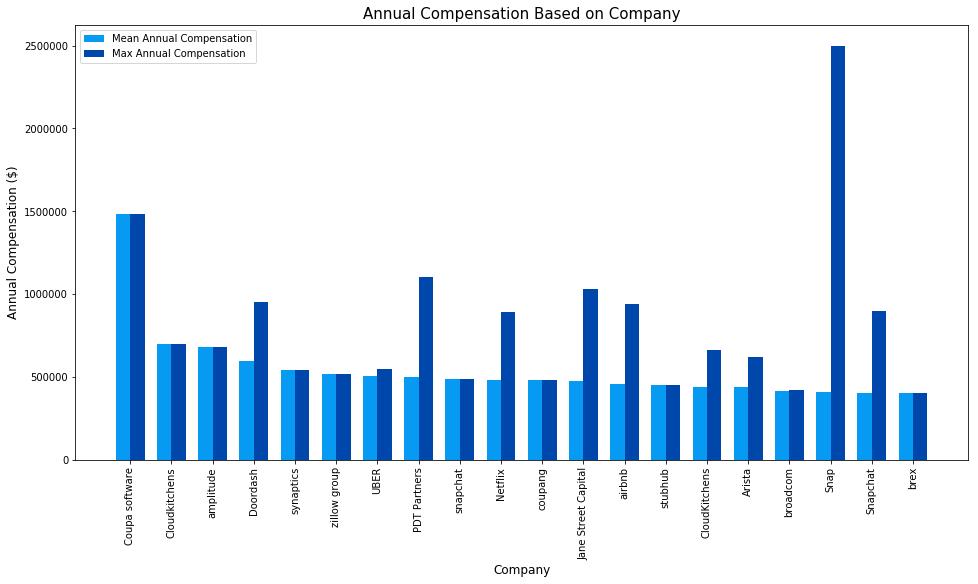

In [82]:
N = annualCompdf_company.shape[0]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, list(annualCompdf_company['meanAnnualComp']), width, color='#069AF3')
rects2 = ax.bar(ind+width, list(annualCompdf_company['maxAnnualComp']), width, color='#0047AB')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( list(annualCompdf_company.index) )

ax.legend( (rects1[0], rects2[0]), ('Mean Annual Compensation', 'Max Annual Compensation') )
plt.xticks(rotation=90)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Annual Compensation ($)', fontsize=12)
plt.title('Annual Compensation Based on Company', fontsize=15)


plt.show()

Do the same analysis but based on location instead of title/company

In [83]:
meanAnnualComp_location = df[['location', 'totalyearlycompensation']].groupby(['location']).mean().rename(columns={"totalyearlycompensation": "meanAnnualComp"})
maxAnnualComp_location = df[['location', 'totalyearlycompensation']].groupby(['location']).max().rename(columns={"totalyearlycompensation": "maxAnnualComp"})
annualCompdf_location = meanAnnualComp_location.join(maxAnnualComp_location, on=['location']).sort_values(by=['meanAnnualComp'], ascending=False).head(20)


In [84]:
annualCompdf_location

,meanAnnualComp,maxAnnualComp
location,,
"Aspen, CO",650000.000000,650000
"Chapel Hill, NC",605000.000000,759000
"San Mateo, FL",486000.000000,698000
"Highland Park, NJ",480000.000000,480000
"Los Gatos, CA",479185.840708,893000
"Wimborne Minster, EN, United Kingdom",444000.000000,444000
"Los Altos, CA",436000.000000,840000
"Londonderry, OH",405000.000000,405000
"Nazareth Illit, HZ, Israel",390000.000000,390000


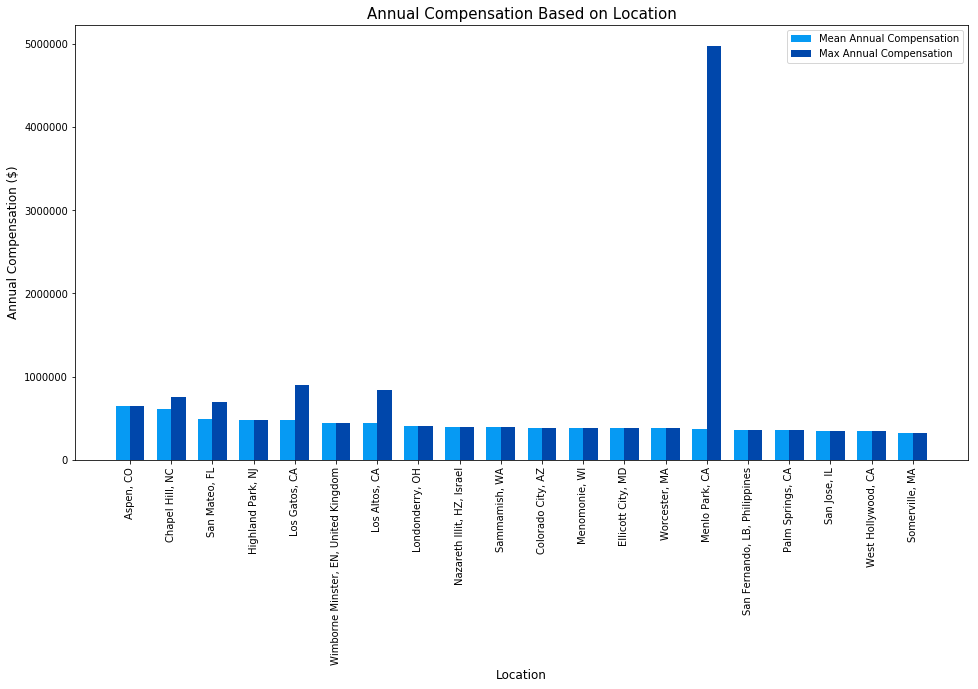

In [85]:
N = annualCompdf_location.shape[0]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, list(annualCompdf_location['meanAnnualComp']), width, color='#069AF3')
rects2 = ax.bar(ind+width, list(annualCompdf_location['maxAnnualComp']), width, color='#0047AB')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( list(annualCompdf_location.index) )

ax.legend( (rects1[0], rects2[0]), ('Mean Annual Compensation', 'Max Annual Compensation') )
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Annual Compensation ($)', fontsize=12)
plt.title('Annual Compensation Based on Location', fontsize=15)


plt.show()

In [86]:
df[df['totalyearlycompensation'] == 4980000]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
61991,7/30/2021 22:23:24,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,Product,380000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree


Conclusions:

- The upper-bound for annual total compensation is very high compared to the mean annual total compensation.

- Within companies, there are some which have very large max annual compensation compared to the mean annual compensation meaning some companies are able to offer their employees considerable perks 

- There is one very clear outlier where their total annual compensation is much much larger than the average for that area.  They work at Facebook in Menlo Park, CA.  Besides this most areas don't have a instances where their employees are able to get more annual compensation that the average.  Exceptions are San Mateo, FL; Lost Gastos, CA; Los Altos, CA 



## What is the average number of years people stay at a company?

In [87]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [88]:
df['yearsatcompany'].value_counts()

0.000     15916
1.000     11791
2.000     10329
3.000      6989
4.000      4685
5.000      3783
6.000      2071
7.000      1392
8.000      1155
10.000      936
9.000       638
12.000      375
15.000      329
11.000      293
1.500       247
13.000      237
14.000      206
0.500       186
2.500       183
20.000      168
16.000       98
3.500        86
18.000       60
17.000       54
19.000       53
4.500        49
21.000       30
0.250        27
22.000       25
25.000       23
          ...  
2.400         2
2.800         2
33.000        2
0.330         2
2.700         2
28.000        2
3.700         2
3.800         2
2.600         2
30.000        2
1.750         2
34.000        2
1.700         2
4.750         1
69.000        1
40.000        1
1.250         1
1.900         1
2.900         1
0.850         1
1.666         1
32.000        1
3.300         1
4.200         1
0.750         1
0.580         1
4.400         1
15.500        1
1.100         1
4.800         1
Name: yearsatcompany, Le

Conclusions:

- Most people stay with the company for only a few years before moving on since the number of people with more years at the same company drastically decreases after 2 years


## Is there any gender bias for the total annual compensation in the tech industry?

Here I'll only look at male-vs-female overall compensation since that's what I'll be modeling later in this notebook.  I'll also group by job title since from previous plots it was evident that job location and company play a big role, however grouping by job title would average all of that out and be a better comparison of the gender salaries

In [89]:
# Since there are many NaN's for the gender column, I'll filter all those out since I'm specifically interested in male-vs-female gender bias
# For the same reason I'll filter out the 'Other' gender so I only have 'Male' and 'Female'
genderbiasdf = df[['gender', 'title', 'totalyearlycompensation']].dropna()
genderbiasdf = genderbiasdf[(genderbiasdf['gender'] == 'Male') | (genderbiasdf['gender'] == 'Female')]
genderbiasdf.head()


,gender,title,totalyearlycompensation
264,Male,Software Engineer,140000
265,Male,Software Engineer,172000
266,Male,Software Engineer,325000
269,Male,Software Engineer,150000
270,Male,Software Engineer,640000


In [90]:
genderPlotdf = genderbiasdf.groupby(['gender', 'title']).mean().reset_index()
genderPlotdf

,gender,title,totalyearlycompensation
0,Female,Business Analyst,127035.502959
1,Female,Data Scientist,190063.711911
2,Female,Hardware Engineer,194057.692308
3,Female,Human Resources,164023.809524
4,Female,Management Consultant,142973.333333
5,Female,Marketing,182438.423645
6,Female,Mechanical Engineer,156878.048780
7,Female,Product Designer,194970.817121
8,Female,Product Manager,222051.664753
9,Female,Recruiter,151423.312883


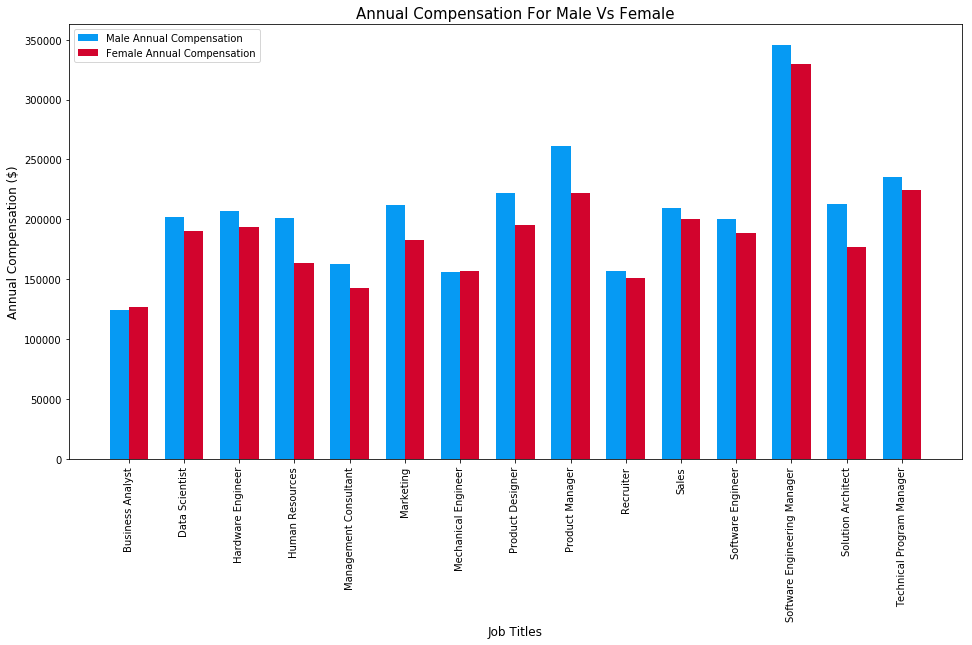

In [91]:
N = len(list(genderPlotdf['title'].unique()))

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, list(genderPlotdf[genderPlotdf['gender'] == 'Male']['totalyearlycompensation']), width, color='#069AF3')
rects2 = ax.bar(ind+width, list(genderPlotdf[genderPlotdf['gender'] == 'Female']['totalyearlycompensation']), width, color='#D2042D')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( list(genderPlotdf['title'].unique()) )

ax.legend( (rects1[0], rects2[0]), ('Male Annual Compensation', 'Female Annual Compensation') )
plt.xticks(rotation=90)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Annual Compensation ($)', fontsize=12)
plt.title('Annual Compensation For Male Vs Female', fontsize=15)


plt.show()

Conclusions:

- We do see a clear gender bias in the data for total annual compensation

- Titles with a discernable gender bias are: Human Resources, Marketing, Product Designer, and Product Manager

- If I had more time, would be nice to see if there's any dependency based on Company and/or location

# Data Preparation, Modeling and Evaluation

##   What are the biggest contributors to the total annual compensation in the tech industry?

Will be using the same steps as done in the Udacity course for predicting salary with some minor tweaks based on the one-hot encoding since some are already done for us in this dataset

### DATA SCIENCE PROCESS: GATHER DATA, ASSESS, CLEAN 

In [92]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    '''
    
    # Drop all the rows with no total annual compensation    
    df_new = df.dropna(subset=['totalyearlycompensation'])
    
    # Drop the following columns from X:
    # timestamp: Not meaningful since it's only the timestamp that the answer was recorded
    # Race: It's already one-hot encoded so all the information is included in the other columns
    # Education: It's already one-hot encoded so all the information is included in the other columns
    # basesalary: Related to totalyealycompensation so I'll remove this feature
    # stockgrantvalue: Related to totalyealycompensation so I'll remove this feature
    # bonus: Related to totalyealycompensation so I'll remove this feature
    # otherdetails: Since this is a free-form field that's filled out by the user
    # rowNumber: Since this is just an identifier value
    # cityid: Since this information is contained in the 'location' column which has no nulls
    # dmaid: Since this information is contained in the 'location' column which has no nulls
    df_new = df_new.drop(['timestamp', 'Race', 'Education', 'basesalary', 'stockgrantvalue', 'bonus', 'otherdetails', 'rowNumber', 'cityid', 'dmaid'], axis=1)
    
    
    # One gender row seems to be an error, the value is 'Title: Senior Software Engineer', I'll drop that row
    # 1/3 of the gender columns is missing values, so I'll fill those with 'NA' and later I'll do one-hot encoding for gender
    # Only 5 rows of data don't have a company specified.  Since it's so little I'll drop those entries
    # For the rows where column tag or level are missing, I'll fill it with 'NA'
    df_new = df_new[df_new['gender'] != 'Title: Senior Software Engineer']
    df_new['gender'] = df_new['gender'].fillna('NA')
    df_new = df_new[df_new['company'].notnull()]
    df_new['tag'] = df_new['tag'].fillna('NA')
    df_new['level'] = df_new['level'].fillna('NA')
    
    # Later when doing the fitting, I noticed that it wouldn't error out, but it wouldn't complete.   I think because there were too many categorical columns that were one-hot encoded.
    # I'll reduce the df to only companies that have more than 100 respondents for that company and location
    df_new['company__location'] = df_new['company'] + '__' + df['location']
    respondents = df_new['company__location'].value_counts() > 100
    largeRespondents = list(respondents[respondents.values].index)
    df_new = df_new[df_new['company__location'].isin(largeRespondents)]
    # Drop the new column that was created since it's not needed anymore
    df_new = df_new.drop(['company__location'], axis=1)

    # The only numerical columns I'd impute are yearsofexperience, yearsatcompany however looks like there are no missing values for these columns

    # Create X as all the columns that are not the total annual compensation column
    X = df_new.drop(['totalyearlycompensation'], axis=1)

    # Create y as the totalyearlycompensation column
    y = df_new['totalyearlycompensation']
        
    # Create dummy columns for all the categorical variables in X that are left
    cat_X_helper = X.select_dtypes(include=['object'])  
    cat_X = pd.get_dummies(cat_X_helper, prefix=list(cat_X_helper.columns))

    #Concat numerical and categorical columns back together
    X = pd.concat([X.select_dtypes(exclude=['object'])  , cat_X], axis=1)
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df) 

In [93]:
X.shape

(27507, 2306)

Run various cutoffs for features like how it was done during the exercises to find the optimal features that should be included in the model.  The find_optimal_lm_mod and coef_weights were functions taken from exercises and reused here with a small alteration to the coef_weights to better-understand the data

### DATA SCIENCE PROCESS: MODEL

In [94]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc='upper left')
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

NOTE: When I included all companies and locations the find_optimal_lm_mod didn't error out, but didn't finish either.  Looks like it's taking a long time with doing the X.sum(), I think because there were so many one-hot encoded columns after dummy'ing the categorical columns, so instead I limited this investigation to companies in locations that have more than 100 respondents

### DATA SCIENCE PROCESS: ANALYZE AND VISUALIZE

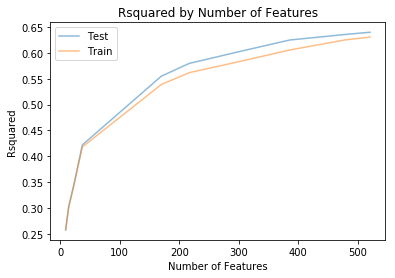

In [95]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 20, 10, 5, 4]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

Now use the coef_weights from the exercises to see which features have the largest weights in determining the totalyearlycompensation

In [96]:
def coef_weights(coefficients, X_train, ascending=True):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('coefs', ascending=ascending)
    return coefs_df

In [97]:
coef_weights(lm_model.coef_, X_train, True).head(30)


,est_int,coefs,abs_coefs
319,"location_Amsterdam, NH, Netherlands",-1.094978e+18,1.094978e+18
49,company_Yandex,-2.364526e+17,2.364526e+17
39,company_Qualcomm,-1.967753e+17,1.967753e+17
34,company_Netflix,-1.344483e+17,1.344483e+17
517,gender_Female,-1.062445e+17,1.062445e+17
518,gender_Male,-1.062445e+17,1.062445e+17
519,gender_NA,-1.062445e+17,1.062445e+17
520,gender_Other,-1.062445e+17,1.062445e+17
19,company_Capital One,-9.053895e+16,9.053895e+16
20,company_Cisco,-7.878094e+16,7.878094e+16


In [98]:
coef_weights(lm_model.coef_, X_train, False).head(30)

,est_int,coefs,abs_coefs
17,company_Booking.com,1.148150e+18,1.148150e+18
332,"location_Moscow, MC, Russia",2.896245e+17,2.896245e+17
340,"location_San Diego, CA",2.499471e+17,2.499471e+17
330,"location_Los Gatos, CA",1.876202e+17,1.876202e+17
348,"location_Washington, DC",1.437108e+17,1.437108e+17
339,"location_Richmond, VA",1.437108e+17,1.437108e+17
342,"location_San Jose, CA",1.319528e+17,1.319528e+17
35,company_Nvidia,1.238827e+17,1.238827e+17
28,company_Intel,1.238827e+17,1.238827e+17
336,"location_Pleasanton, CA",5.530158e+16,5.530158e+16


Conclusions based on the linear model:

- Location plays a central role in overall compensation, majority of locations being in California

-->This agrees with the analysis done in the previous sections

- Company Booking.com, Nvidia and Intel have good overall compensation, whereas other companies do not like Yandex, Qualcomm, Netflix

--> This result seems strange to me.  Booking.com, Nvidia, and Intel are all companies that are NOT in the top 20 for highest mean annual total compensation which was analyzed above.  Also Netflix IS in the top 20 companies with high mean annual total compensation according to the analysis above but the coefficient weight is negative meaning the model is indicating working at Netflix will have a negative impact on your overall annual compensation

- Years of experience, years at the company, tag, race, education, and gender don't play as much of a central role as location and company do since their coefficients don't show up in the top 20 weights

Because of these descrepancies I'll generally conclude from the model that:

- Location and company play a key role in your total annual compensation, with companies in CA providing better compensation

I won't conclude any of the other findings based on the model since I'm unsure of it's accuracy due to the discrespancies mentioned



# Deployment

It was requested to push this notebook to a github repo and create a blog post of the findings.  Both are complete and available below

Github Repo: https://github.com/daverizon/tech_job_salaries

Blog Post: https://medium.com/@daniel.abreu_14097/salaries-in-tech-9f5ef4b3f218